In [1]:
################################################################################################################################################
################################################################################################################################################
############################################# PROGRAM TO CREATE XGBOOST REGRESSION MODEL #######################################################
################################################################################################################################################
################################################################################################################################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
################################################ Read the Housing Data CSV file ##############################################################
column_names = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE',
                'DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

""" Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's
 """
data_boston = pd.read_csv("../data/bostonhousingdata.csv", header=None, delimiter=r"\s+", names=column_names)
data_boston.head(20)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [3]:
##################################### Define Dependent and Independent Attributes ##########################################################
df = data_boston.drop(columns=["MEDV"])
df.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10


In [4]:
target = data_boston[["MEDV"]]
target.head(10)

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [5]:
###################################################################################################################################
##################################### Model Evaluation on Training and Testing Data ###############################################
###################################################################################################################################

from sklearn.model_selection import train_test_split

############################ Split the data into test and training (15% as test data) #############################################
x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.15, random_state=10)

In [7]:
print("Number of test samples :", x_test.shape[0])
print("Number of training samples:",x_train.shape[0])

Number of test samples : 76
Number of training samples: 430


In [8]:
###################################################################################################################################
###################################### Create Random Forest Regression Model ######################################################
###################################################################################################################################
from sklearn.ensemble import RandomForestRegressor

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42, oob_score=True)
rf_regressor.fit(x_train, y_train)

C:\Users\madan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\madan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_forest.py:615: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=42)

In [9]:
predictions_train = rf_regressor.predict(x_train)

In [10]:
########################################### Model accuracy using Training Data ###################################################
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

oob_score = rf_regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
mse_train = mean_squared_error(y_train,predictions_train)
print("Mean square error is",mse_train)
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
print(f"Root Mean Squared Error (RMSE): {rmse_train}")
mae_train = mean_absolute_error(y_train, predictions_train)
print(f"Mean Absolute Error (MAE): {mae_train}")
print("R-Square:", r2_score(y_train,predictions_train))

Out-of-Bag Score: 0.7367318422572959
Mean square error is 2.8775332558139537
Root Mean Squared Error (RMSE): 1.696329347683979
Mean Absolute Error (MAE): 1.0293255813953488
R-Square: 0.9622661685104373


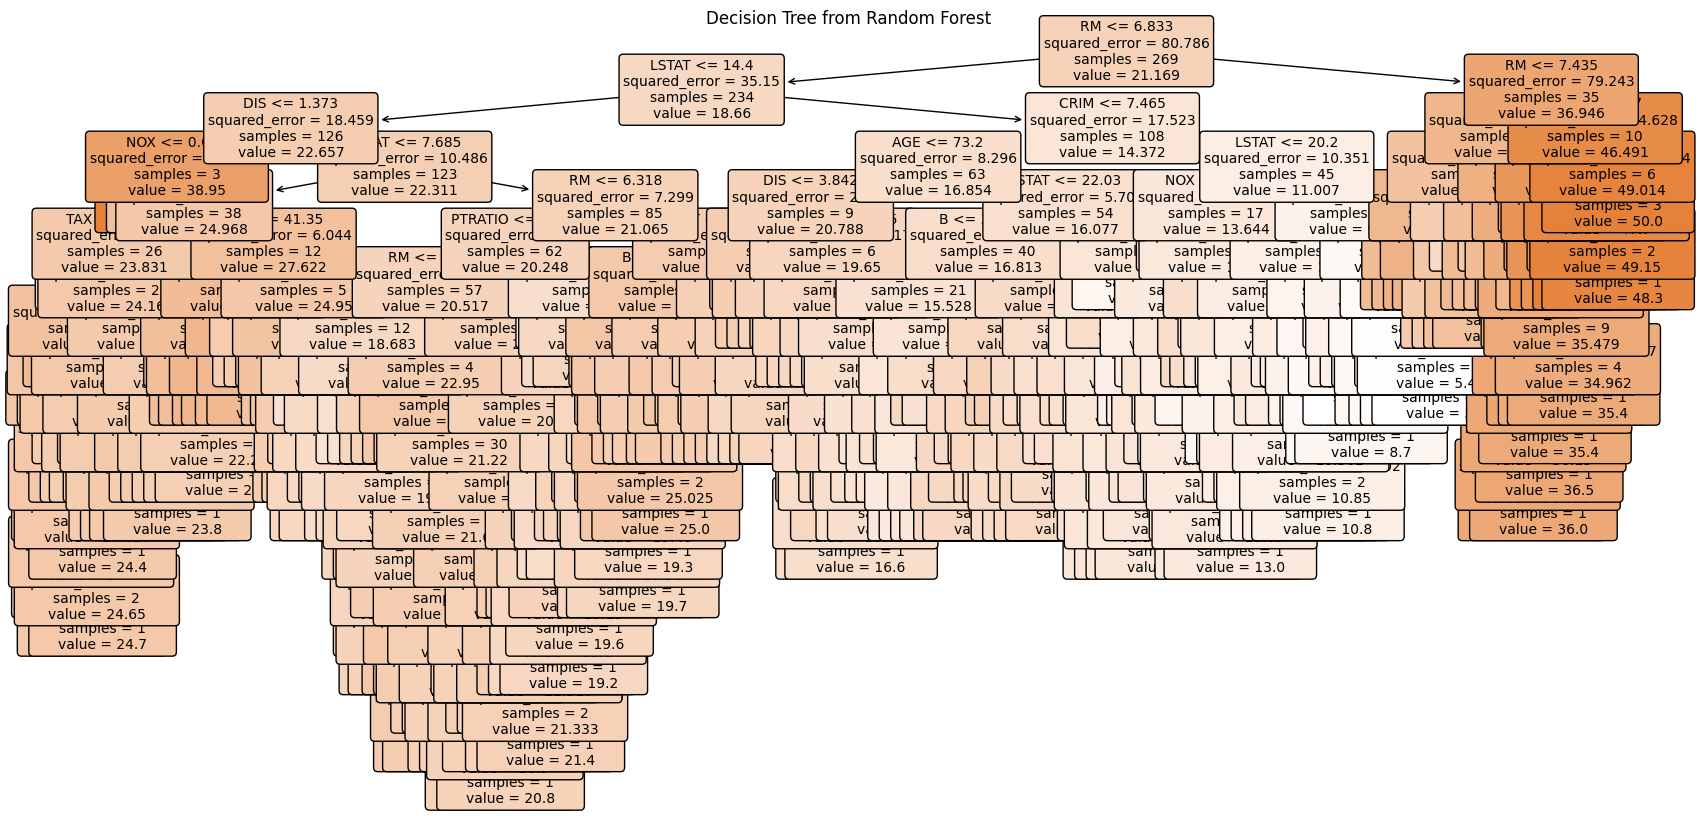

In [11]:
############################### Visualize one of the tree from Random Forest Model ################################################
from sklearn.tree import plot_tree

tree_to_plot = rf_regressor.estimators_[0]

plt.figure(figsize=(20, 10))
plot_tree(tree_to_plot, feature_names=df.columns.tolist(), filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree from Random Forest")
plt.show()

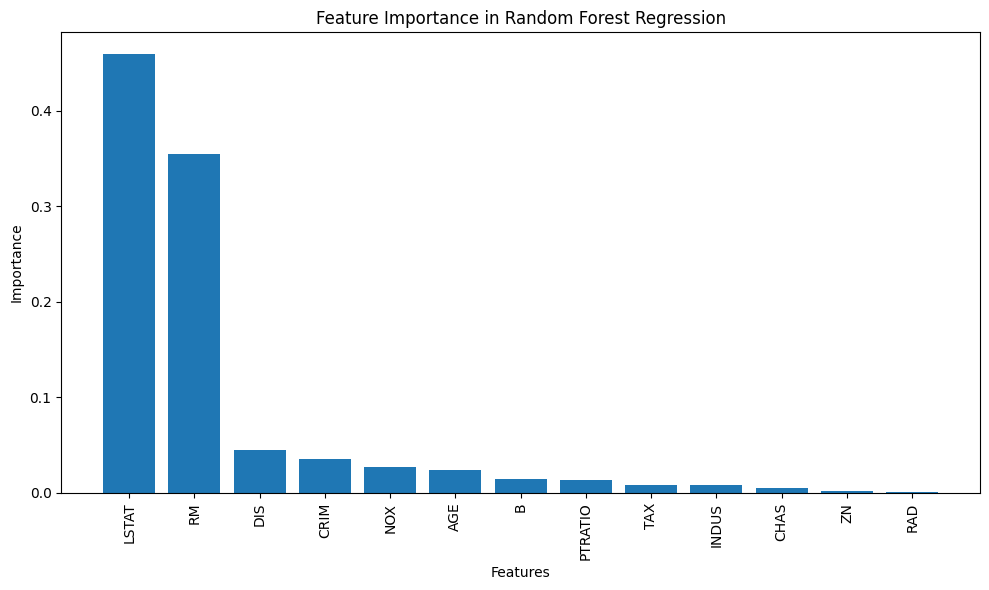

In [19]:
############################### Feature Importance Plot from Random Forest Model ##################################################
importances = rf_regressor.feature_importances_
feature_names = df.columns # If X is a DataFrame, use X.columns; otherwise, provide a list of feature names
sorted_idx = importances.argsort()[::-1] # Sort in descending order

plt.figure(figsize=(10, 6))
plt.bar(range(x_train.shape[1]), importances[sorted_idx])
plt.xticks(range(x_train.shape[1]), feature_names[sorted_idx], rotation=90)
plt.title("Feature Importance in Random Forest Regression")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()

In [20]:
##################################################################################################################################
######################################## Prediction using Test Data ##############################################################
##################################################################################################################################
predictions_test = rf_regressor.predict(x_test)
print(predictions_test[0:5])

[24.09 33.04 25.19 28.8  22.19]


In [21]:
########################################### Model accuracy using Test Data #######################################################
mse_test = mean_squared_error(y_test,predictions_test)
print("Mean square error is",mse_test)
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print(f"Root Mean Squared Error (RMSE): {rmse_test}")
mae_test = mean_absolute_error(y_test, predictions_test)
print(f"Mean Absolute Error (MAE): {mae_test}")
print("R-Square value using test data is", r2_score(y_test,predictions_test))

Mean square error is 19.074255263157898
Root Mean Squared Error (RMSE): 4.367408300486445
Mean Absolute Error (MAE): 2.997631578947369
R-Square value using test data is 0.832214040822284
